In [11]:
import pandas as pd
from xgboost import XGBClassifier
from sklearn.metrics import roc_auc_score
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report, confusion_matrix
import numpy as np
#import matplotlib.pyplot as plt
#import seaborn as sns
import sys

In [12]:
df_train = pd.read_csv('../../data/X_train.csv')
df_drift = pd.read_csv('../../data/X_drift.csv')

In [13]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22481 entries, 0 to 22480
Data columns (total 15 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   PolicyId           22481 non-null  object 
 1   AgeConducteur      22481 non-null  float64
 2   SexeConducteur     22481 non-null  object 
 3   StatutMatrimonial  7372 non-null   object 
 4   BonusMalus         22481 non-null  float64
 5   FrequencePaiement  22481 non-null  object 
 6   CodeProfession     7372 non-null   object 
 7   AgeVehicule        22481 non-null  float64
 8   ClasseVehicule     22481 non-null  object 
 9   PuissanceVehicule  22481 non-null  object 
 10  CarburantVehicule  22481 non-null  object 
 11  UsageVehicule      22481 non-null  object 
 12  Garage             22481 non-null  object 
 13  Region             22481 non-null  object 
 14  PrimeCommerciale   22481 non-null  float64
dtypes: float64(4), object(11)
memory usage: 2.6+ MB


In [14]:
df_drift.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22481 entries, 0 to 22480
Data columns (total 15 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   PolicyId           22481 non-null  object 
 1   AgeConducteur      22481 non-null  float64
 2   SexeConducteur     22481 non-null  object 
 3   StatutMatrimonial  7372 non-null   object 
 4   BonusMalus         22481 non-null  float64
 5   FrequencePaiement  22481 non-null  object 
 6   CodeProfession     7372 non-null   object 
 7   AgeVehicule        22481 non-null  float64
 8   ClasseVehicule     22481 non-null  object 
 9   PuissanceVehicule  22481 non-null  object 
 10  CarburantVehicule  22481 non-null  object 
 11  UsageVehicule      22481 non-null  object 
 12  Garage             22481 non-null  object 
 13  Region             22481 non-null  object 
 14  PrimeCommerciale   22481 non-null  float64
dtypes: float64(4), object(11)
memory usage: 2.6+ MB


In [15]:
# drfit analysis 

" add a binary target column to indicate source dataset in train and drift datasets"
df_train['source'] = 0
df_drift['source'] = 1
df_combined = pd.concat([df_train, df_drift], ignore_index=True)


In [16]:
df_combined.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 44962 entries, 0 to 44961
Data columns (total 16 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   PolicyId           44962 non-null  object 
 1   AgeConducteur      44962 non-null  float64
 2   SexeConducteur     44962 non-null  object 
 3   StatutMatrimonial  14744 non-null  object 
 4   BonusMalus         44962 non-null  float64
 5   FrequencePaiement  44962 non-null  object 
 6   CodeProfession     14744 non-null  object 
 7   AgeVehicule        44962 non-null  float64
 8   ClasseVehicule     44962 non-null  object 
 9   PuissanceVehicule  44962 non-null  object 
 10  CarburantVehicule  44962 non-null  object 
 11  UsageVehicule      44962 non-null  object 
 12  Garage             44962 non-null  object 
 13  Region             44962 non-null  object 
 14  PrimeCommerciale   44962 non-null  float64
 15  source             44962 non-null  int64  
dtypes: float64(4), int64(1

In [17]:
df_combined['source'].value_counts()

source
0    22481
1    22481
Name: count, dtype: int64

In [18]:
# train Xgboost classifier to detect drift tanks to AUC-ROC score
X = df_combined.drop('source', axis=1)
y = df_combined['source']


In [19]:
# Identify numerical and categorical columns
num_var = X.select_dtypes(include=["float64", "int64"]).columns
cat_var = X.select_dtypes(include=["object","category"]).columns

In [20]:
# 
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), num_var),           
        ('cat', OneHotEncoder(handle_unknown='ignore'), cat_var)
    ]
)

In [21]:
import matplotlib.pyplot as plt
from sklearn.metrics import (
    accuracy_score, precision_score, recall_score, f1_score, roc_auc_score,
    confusion_matrix, ConfusionMatrixDisplay, classification_report
)

# Evaluation function
def evaluate_model(y_test, y_pred, y_prob):
    print("Accuracy:", accuracy_score(y_test, y_pred))
    print("Precision:", precision_score(y_test, y_pred))
    print("Recall:", recall_score(y_test, y_pred))
    print("F1-score:", f1_score(y_test, y_pred))
    print("AUC:", roc_auc_score(y_test, y_prob))
    
    print("\nClassification Report:")
    print(classification_report(y_test, y_pred))
    
    cm = confusion_matrix(y_test, y_pred)
    ConfusionMatrixDisplay(cm).plot()
    plt.show()

In [22]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)

c:\Users\CYTech Student\anaconda3\envs\mon_env\Lib\site-packages\xgboost\training.py:199: UserWarning: [23:09:47] WARNING: C:\miniconda3\conda-bld\xgboost-split_1764761400759\work\src\learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)



=== XGBoost ===
Accuracy: 0.9739046630587886
Precision: 0.9568324757004002
Recall: 0.9925860023724793
F1-score: 0.9743813682678312
AUC: 0.9980342518996101

Classification Report:
              precision    recall  f1-score   support

           0       0.99      0.96      0.97      6745
           1       0.96      0.99      0.97      6744

    accuracy                           0.97     13489
   macro avg       0.97      0.97      0.97     13489
weighted avg       0.97      0.97      0.97     13489



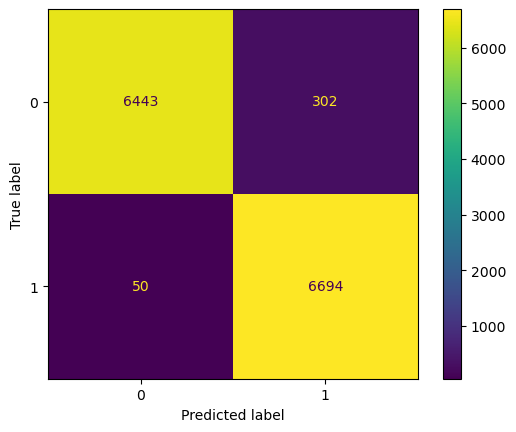

In [23]:
# ===========================
# XGBoost Model
# ===========================
xgb = Pipeline(steps=[
    ('preprocess', preprocessor),
    ('model', XGBClassifier(
        n_estimators=300,
        learning_rate=0.05,
        max_depth=5,
        subsample=0.8,
        colsample_bytree=0.8,
        scale_pos_weight=3,  # gérer le déséquilibre
        eval_metric='logloss',
        random_state=42,
        use_label_encoder=False  # Important pour éviter les warnings
    ))
])

xgb.fit(X_train, y_train)
y_pred_xgb = xgb.predict(X_test)
y_prob_xgb = xgb.predict_proba(X_test)[:, 1]

print("\n=== XGBoost ===")
evaluate_model(y_test, y_pred_xgb, y_prob_xgb)


In [34]:
# drop the 'source' column from both datasets
df_train = df_train.drop('source', axis=1)
df_drift = df_drift.drop('source', axis=1)

In [35]:
import numpy as np
import pandas as pd

def calculate_psi(df_expected, df_actual, buckettype='quantiles', buckets=10, drift_thresholds=(0.1, 0.25)):
    """
    Calculate PSI for both numerical and categorical variables with a descriptive summary.
    
    Args:
        df_expected: pandas DataFrame, reference/original data
        df_actual: pandas DataFrame, new data to compare
        buckettype: 'bins' or 'quantiles' for numeric variables
        buckets: number of buckets for numeric variables
        drift_thresholds: tuple (moderate, significant) PSI thresholds
    
    Returns:
        psi_summary: pandas DataFrame with PSI values and drift interpretation
    """

    def psi_numeric(expected_array, actual_array, buckets):
        """PSI for numerical variables"""
        def scale_range(input_array, min_val, max_val):
            input_array = input_array - np.min(input_array)
            input_array = input_array / np.max(input_array) * (max_val - min_val)
            input_array = input_array + min_val
            return input_array

        breakpoints = np.arange(0, buckets + 1) / buckets * 100
        if buckettype == 'bins':
            breakpoints = scale_range(breakpoints, np.min(expected_array), np.max(expected_array))
        else:
            breakpoints = np.percentile(expected_array, breakpoints)

        expected_fractions = np.histogram(expected_array, bins=breakpoints)[0] / len(expected_array)
        actual_fractions = np.histogram(actual_array, bins=breakpoints)[0] / len(actual_array)

        def sub_psi(e, a):
            e, a = max(e, 1e-4), max(a, 1e-4)
            return (e - a) * np.log(e / a)

        return np.sum([sub_psi(e, a) for e, a in zip(expected_fractions, actual_fractions)])

    def psi_categorical(expected_array, actual_array):
        """PSI for categorical variables"""
        expected_counts = pd.Series(expected_array).value_counts(normalize=True)
        actual_counts = pd.Series(actual_array).value_counts(normalize=True)

        categories = set(expected_counts.index).union(set(actual_counts.index))
        psi_value = 0
        for cat in categories:
            e = expected_counts.get(cat, 1e-4)
            a = actual_counts.get(cat, 1e-4)
            psi_value += (e - a) * np.log(e / a)
        return psi_value

    # Séparer les colonnes numériques et catégorielles
    numeric_cols = df_expected.select_dtypes(include=np.number).columns
    categorical_cols = df_expected.select_dtypes(exclude=np.number).columns

    psi_dict = {}

    # Calcul PSI pour numérique
    for col in numeric_cols:
        psi_dict[col] = psi_numeric(df_expected[col].values, df_actual[col].values, buckets)

    # Calcul PSI pour catégoriel
    for col in categorical_cols:
        psi_dict[col] = psi_categorical(df_expected[col].values, df_actual[col].values)

    # Résumé descriptif
    summary = []
    for col, psi_val in psi_dict.items():
        if psi_val < drift_thresholds[0]:
            drift = "No drift"
        elif psi_val < drift_thresholds[1]:
            drift = "Moderate drift"
        else:
            drift = "Significant drift"
        summary.append({"Variable": col, "PSI": psi_val, "Drift": drift})

    psi_summary = pd.DataFrame(summary).sort_values(by="PSI", ascending=False).reset_index(drop=True)
    return psi_summary


In [33]:
# Calcul PSI
psi_summary = calculate_psi(df_train, df_drift)
psi_summary

,Variable,PSI,Drift
0,source,9.209419,Significant drift
1,BonusMalus,4.043374,Significant drift
2,AgeVehicule,3.025597,Significant drift
3,ClasseVehicule,2.439806,Significant drift
4,FrequencePaiement,0.605508,Significant drift
5,AgeConducteur,0.601436,Significant drift
6,PrimeCommerciale,0.462919,Significant drift
7,PolicyId,0.000000,No drift
8,SexeConducteur,0.000000,No drift
9,StatutMatrimonial,0.000000,No drift


In [ ]:
# Utilisation de la fonction PSI de skorecard ING BANK
from skorecard.reporting import psi
from skorecard.bucketers import DecisionTreeBucketer

# Après bucketing des données
psi_dict = psi(df_train, df_drift)
psi_dict 

{'PolicyId': 0.0,
 'AgeConducteur': 1.0563529912497733,
 'SexeConducteur': 0.0,
 'StatutMatrimonial': 0.0,
 'BonusMalus': 8.71912037523559,
 'FrequencePaiement': 0.6060633207404427,
 'CodeProfession': 0.0,
 'AgeVehicule': 3.4394590487522683,
 'ClasseVehicule': 2.4441539238701915,
 'PuissanceVehicule': 0.0,
 'CarburantVehicule': 0.0,
 'UsageVehicule': 0.0,
 'Garage': 0.0,
 'Region': 0.0,
 'PrimeCommerciale': 1.4379520858825219}